In [1]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating the DataFrame of the CSV File
df = pd.read_csv('diamonds.csv')

# Dropping the Index Column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Four main features which are used to access the quality of a diamond=
1.Carat Weight
2.Cut
3.Clarity
4.Color

**CARAT WEIGHT** :Carat is a metric that is used to measure the weight of a diamond. One carat is equivalent to 200mg. Diamond prices increase with diamond carat weight.

**CALARITY** :Based on the amount of inclusion and blemishes, the clarity of a diamond is categorized such as FL, IF, VSS1, VSS2, VS1, VS2, SI1, SI2, I1, I2, I3. 

**CUT**: This feature is an important thing to notice in a diamond as it measures three crucial things, such as Brilliance,Fire,Scintillation

**Depth** is the distance from a top surface i.e., table to a culet. The depth percentage is calculated by dividing the diamond depth by the overall width of a diamond.

**TABLE** :The table is the topmost surface of a diamond and also the most significant facet of the round diamond,The table percentage is calculated by dividing the table width by overall diamond width

**COLOR** :The color scale is categorized from D to Z letters.D ,E,F - Colorless G,H,I,J - Near colorlessness K, L, M - Faint color N-R: Very Light Color S-Z: light color

**X,Y,Z :** length,Width, and Depth we need to check the L/W ratio, If the ratio is between 1 and 1.05, it is a round diamond, and an oval shape diamond L/W ratio can be around 1.50 or less.

# Information abount column & their Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Number of Rows & Columns

In [5]:
df.shape

(53940, 10)

# Let us check each of the unique values present in these certain features.

In [6]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# 1) Checking For Null Values

In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**There are no missing values**

# 2) EDA

### 1) Price Distribution Plot

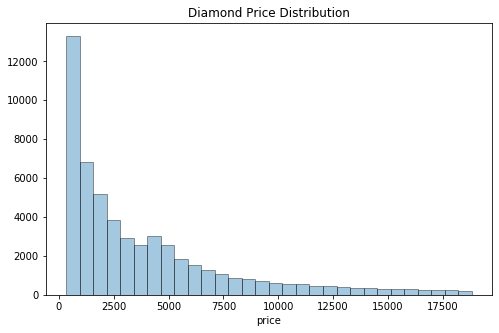

In [9]:
plt.figure(figsize=(8, 5))
sns.distplot(a=df['price'], bins=30, kde=False, hist_kws={'ec':'black'})

plt.title('Diamond Price Distribution');

- **We can see that the Price Distribution is not Normal**
- **The Prices are skewed to the Right**

In [10]:
print(f"The mean of the Price is {round(df['price'].mean())} $")
print(f"The median of the Price is {round(df['price'].median())} $")      

The mean of the Price is 3933 $
The median of the Price is 2401 $


### 2) Box Plot for Price Column

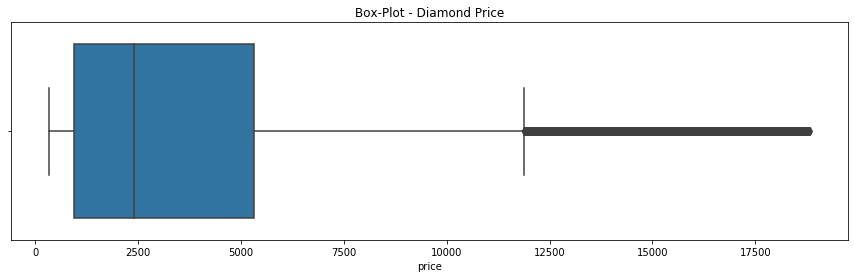

In [11]:
plt.figure(figsize=(15, 4))
sns.boxplot(x=df["price"])

plt.title('Box-Plot - Diamond Price');

### 3) Correlation With Price Column

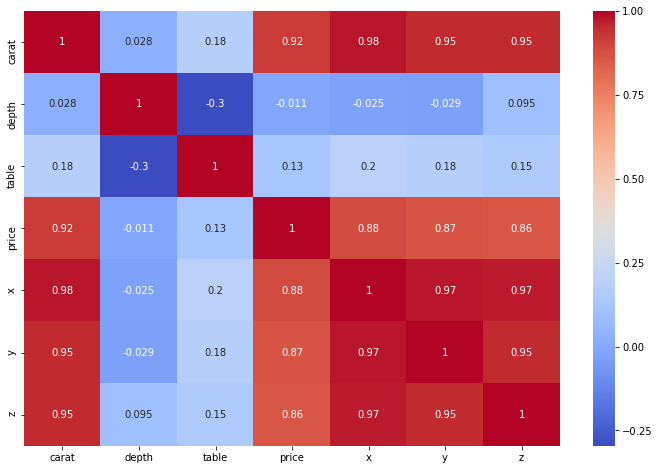

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# To prevent cutting of the heatmap
plt.ylim(plt.gca().get_ylim()[0] + 0.5, plt.gca().get_ylim()[1] - 0.5);

- **We can see that Carat column has the highest correlation with the Price column**
- **The siize columns x, y, z also have a very high correlation with the Price column**

## Let's check the ScatterPlot of the Columns with the highest Correlation

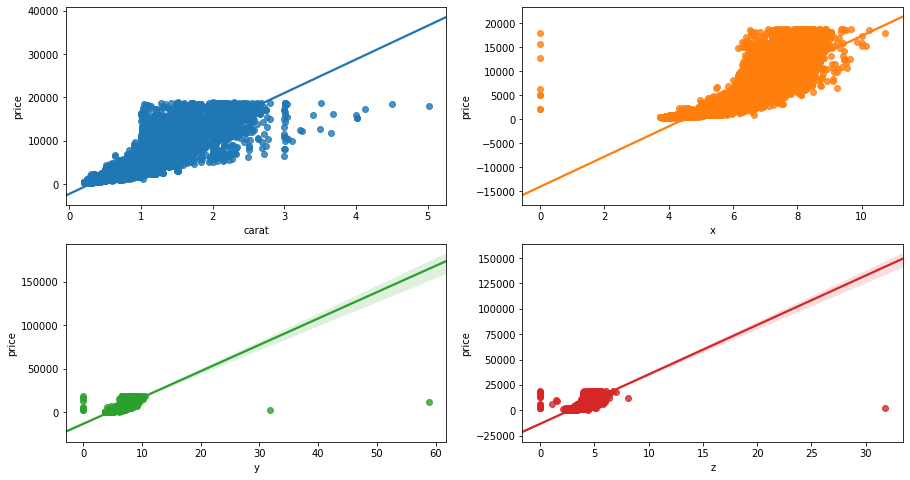

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.flatten()

sns.regplot(x="carat", y="price", data=df, ax=ax[0])
sns.regplot(x="x", y="price", data=df, ax=ax[1])
sns.regplot(x="y", y="price", data=df, ax=ax[2])
sns.regplot(x="z", y="price", data=df, ax=ax[3]);

**We can see that all the above columns have a Positive Linear RelationShip with the Target Variable**

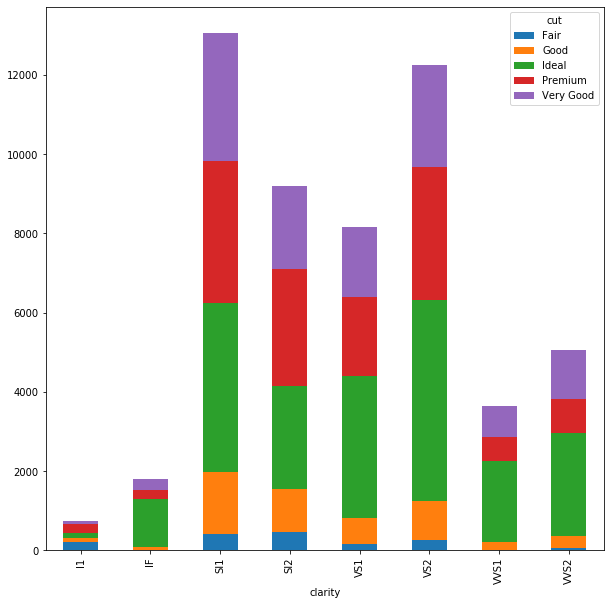

In [14]:
#clarity vs cut
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True);

**We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category**

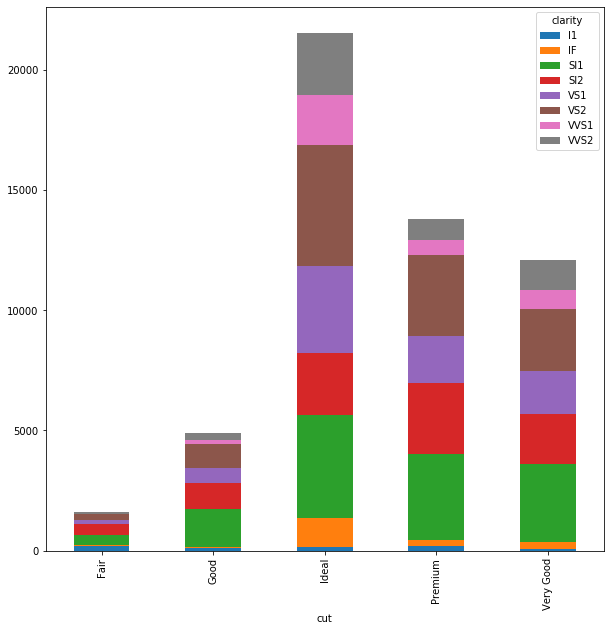

In [15]:
#cut vs clarity
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True);

- **We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.**


## Let's check the BoxPlot of the Columns with the Highest Correlations with Target Column

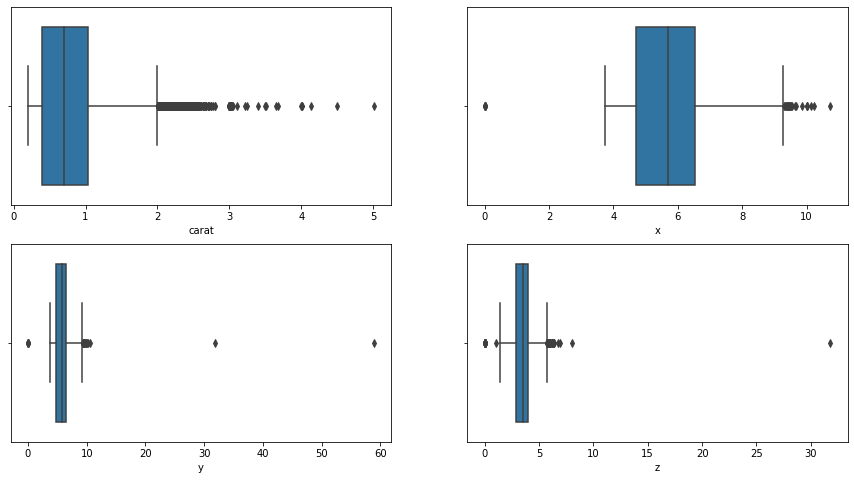

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.flatten()

sns.boxplot(x=df["carat"], ax=ax[0])
sns.boxplot(x=df["x"], ax=ax[1])
sns.boxplot(x=df["y"], ax=ax[2])
sns.boxplot(x=df["z"], ax=ax[3])

- **We can observe from the Box Plot above that there are some values of x, y, z which are 0, which cannot be correct because x, y, z are related to size, We should drop those values**
- **Also there are some outliers which are way above the normal range, We will also drop those**

**Dropping all the Columns where Values of x,y,z are 0**

In [17]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [18]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


**We can see that all the columns with x,y,z = 0 have been dropped**

**Now we will Drop all the Extreme Outliers from y,z Columns**

In [19]:
df = df[(df[['y']] < 25).any(axis=1)]
df = df[(df[['z']] < 25).any(axis=1)]

df.reset_index(inplace=True, drop=True)

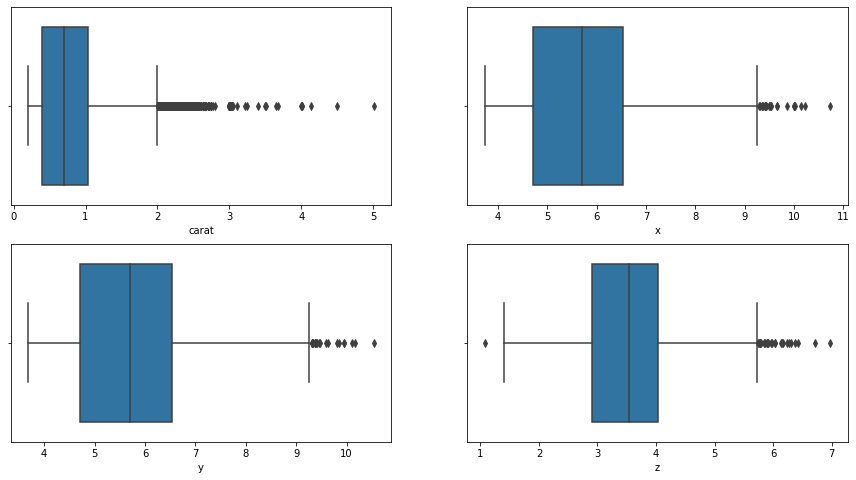

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.flatten()

sns.boxplot(x=df["carat"], ax=ax[0])
sns.boxplot(x=df["x"], ax=ax[1])
sns.boxplot(x=df["y"], ax=ax[2])
sns.boxplot(x=df["z"], ax=ax[3])

**From the above Box Plot We can see that we have removed all the extreme outliers**

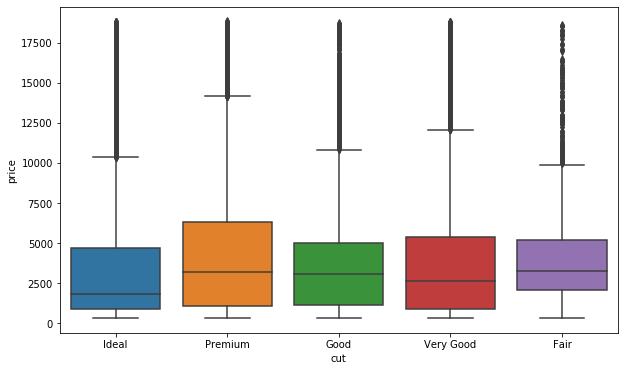

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df);

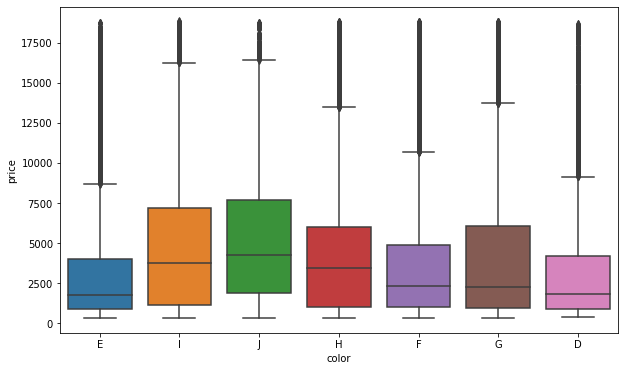

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=df);

**We can see that there are Expensive Diamonds in every Category regardless of Color**

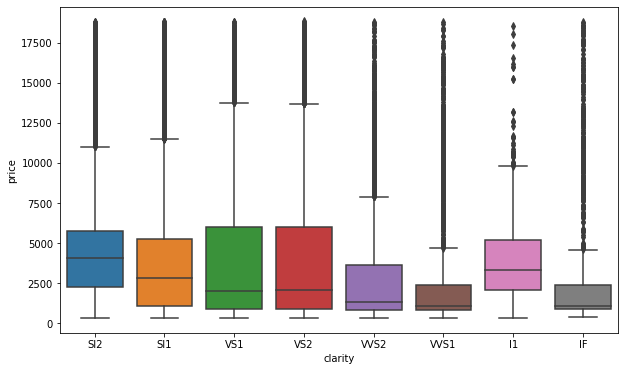

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df)

**We can see that there are Expensive Diamonds in every Category regardless of Clarity**

In [24]:
df.select_dtypes(exclude='object')

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53912,0.72,60.8,57.0,2757,5.75,5.76,3.50
53913,0.72,63.1,55.0,2757,5.69,5.75,3.61
53914,0.70,62.8,60.0,2757,5.66,5.68,3.56
53915,0.86,61.0,58.0,2757,6.15,6.12,3.74


# 3) Feature Encoding

**We will map the Categorical Features Individually**

**The Given Categorical Features are Ordinal, so we will try to map the features according to their ordinal Precedence**

In [25]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

In [26]:
# Mapping the Dictionary to our Columns

df.cut = df.cut.map(diamond_cut)
df.clarity = df.clarity.map(diamond_clarity)
df.color = df.color.map(diamond_color)

In [27]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53912,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53913,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53914,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53915,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


**Now our Data is ready for Modelling**

# 4) Modelling

**Linear Regression**

In [28]:
# Seperating our data into Feature & Target Variables
X = df.drop('price', axis=1)

# Taking the Log Transformation of Our Prices
y = np.log(df['price'])

from sklearn.model_selection import train_test_split

# Splitting our Data into Training & Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train, y_train)

regression.score(X_test,  y_test)

0.978864538415431

In [30]:
predictions = regression.predict(X_test)

In [31]:
from sklearn import metrics

print("MSE = {}".format(metrics.mean_squared_error(y_test,predictions)))
print("R2 Score = {}".format(metrics.r2_score(y_test,predictions)))

MSE = 0.021655973235403067
R2 Score = 0.978864538415431


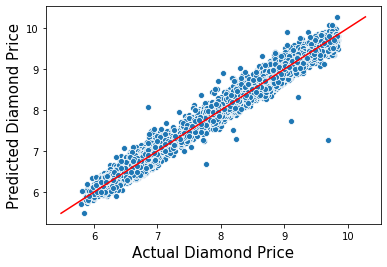

In [32]:
# Plotting Actual vs Predicted Values
sns.scatterplot(x=y_test, y=predictions)
sns.lineplot(predictions, predictions,  color='red') 

plt.xlabel('Actual Diamond Price', fontsize = 15)
plt.ylabel('Predicted Diamond Price', fontsize = 15);

In [33]:
# Difference between Actual & Predicted Values
residuals = y_test - predictions

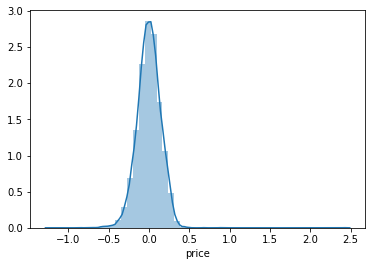

In [34]:
sns.distplot(residuals);

In [35]:
from scipy import stats

In [36]:
stats.skew(residuals)

0.2401155083668948

**The Resiuduals are Normally Distributed**

The Mean of Residuals is 0


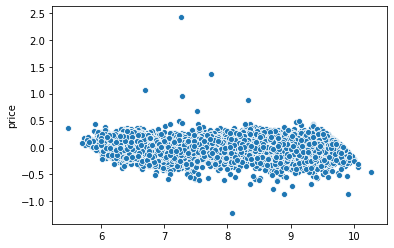

In [37]:
print('The Mean of Residuals is {}' .format(round(residuals.mean())))

sns.scatterplot(predictions,residuals)
plt.show();

**There are no visible patterns, the Given Data is Homoscedastic**

In [38]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(LinearRegression(), X, y, cv=4)

print(np.mean(cv))

0.9424058271805573


**Conclusion**

- **Linear regression a great R2 score 0f 0.98**

- **The price of diamond is mostly explained by the attributes carat, x, y, z**

- **While other attributes contribute very little to determine the price**